Mathematically, let A be an n x n square matrix, λ be a scalar and v be a non-zero vector. Then, λ is called an eigenvalue of A and v is called an eigenvector of A if the following equation is satisfied:

A * v = λ * v

In this equation, A * v is the matrix-vector product of A and v, and λ * v is the scalar multiplication of v by λ.

The eigenvectors are important because they help us understand the behavior of the linear transformation represented by the matrix A. They tell us about the directions in which the transformation stretches or compresses space, and by how much.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt



In [2]:

# Load iris dataset
iris = load_iris()
X = iris.data



In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<img src="../images/covariance-1.png" width="500"/>
<img src="../images/covariance-2.png" width="500"/>



In [4]:
# Compute covariance matrix
cov_mat = np.cov(X.T) # Note before computing covariance matrix, we need to normalize, np.cov does by default
cov_mat, cov_mat.shape 


(array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
        [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
        [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
        [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]]),
 (4, 4))

In [5]:
# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)


1. numpy.linalg.eig(): This function takes the covariance matrix as input and returns two arrays: the eigenvalues and eigenvectors. The eigenvalues represent the amount of variance explained by each eigenvector, and the eigenvectors represent the directions of maximum variance in the data.

2. Sort the eigenvalues and eigenvectors: To identify the principal components of the data, you should sort the eigenvectors by their corresponding eigenvalues in descending order. The eigenvector with the highest eigenvalue will be the first principal component, the eigenvector with the second highest eigenvalue will be the second principal component, and so on.

3. Return the eigenvectors and eigenvalues: Finally, you can return the sorted eigenvectors and eigenvalues as output.

In [6]:

print("Eigenvalues:", "Eigenvectors:")
for e, ev in zip(eigenvalues, eigenvectors):
    print(e, ev)



Eigenvalues: Eigenvectors:
4.228241706034863 [ 0.36138659 -0.65658877 -0.58202985  0.31548719]
0.2426707479286339 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
0.07820950004291913 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
0.023835092973449174 [0.3582892  0.07548102 0.54583143 0.75365743]


In [7]:
# Step 3: Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [8]:
print("Eigenvalues:", "Eigenvectors:")
for e, ev in zip(eigenvalues, eigenvectors):
    print(e, ev)

Eigenvalues: Eigenvectors:
4.228241706034863 [ 0.36138659 -0.65658877 -0.58202985  0.31548719]
0.2426707479286339 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
0.07820950004291913 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
0.023835092973449174 [0.3582892  0.07548102 0.54583143 0.75365743]


0 1.0841597753561043 -0.25356754219370703


ValueError: too many values to unpack (expected 2)

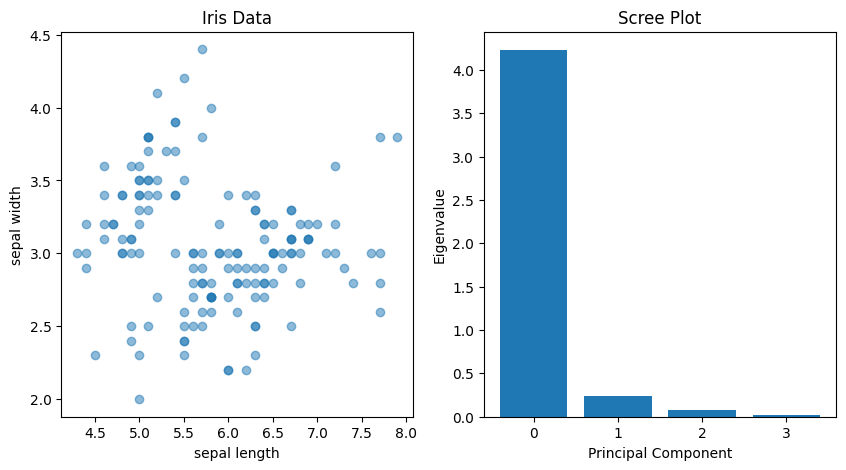

In [18]:
# Plot eigenvalues and eigenvectors and data points
# Step 4: Plot the data, eigenvalues, and eigenvectors
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.5)
ax[0].set_xlabel('sepal length')
ax[0].set_ylabel('sepal width')
ax[0].set_title('Iris Data')

# Plot the eigenvalues
ax[1].bar(np.arange(len(eigenvalues)), eigenvalues)
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Eigenvalue')
ax[1].set_title('Scree Plot')

# Plot the eigenvectors as arrows
for i in range(len(eigenvectors)):
    print(i, eigenvectors[0, i]*3 , eigenvectors[1, i]*3)
    ax[0].annotate(
        f"i", xy=(0, 0),
        xytext=str(eigenvectors[0, i]*3),
        arrowprops=dict(arrowstyle='->')
        )
    ax[0].annotate(
        f"i", xy=(0, 0),
        xytext=str(eigenvectors[1, i]*3),
        arrowprops=dict(arrowstyle='->')
        )
    
ax[0].set_xlim(-10, 10)
ax[0].set_ylim(-10, 10)

plt.show()

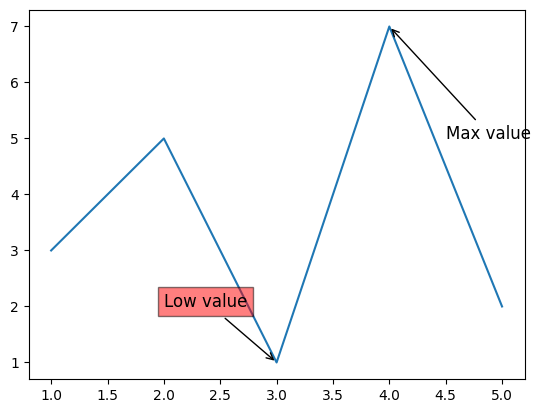

In [31]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [3, 5, 1, 7, 2]

fig, ax = plt.subplots()
ax.plot(x, y)

# Create a vertical line annotation
ax.annotate('Max value', xy=(4, 7), xytext=(4.5, 5),
            arrowprops=dict(arrowstyle='->'), fontsize=12)

# Create a text annotation
ax.annotate('Low value', xy=(3, 1), xytext=(2, 2),
            arrowprops=dict(arrowstyle='->'), fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5))

plt.show()



In [32]:
eigenvectors[0, i]*3

1.0841597753561043

In [13]:
eigenvectors, eigenvectors.shape

(array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]),
 (4, 4))

In [17]:
str(eigenvectors[0, i]*3)

'1.0841597753561043'

ValueError: too many values to unpack (expected 2)

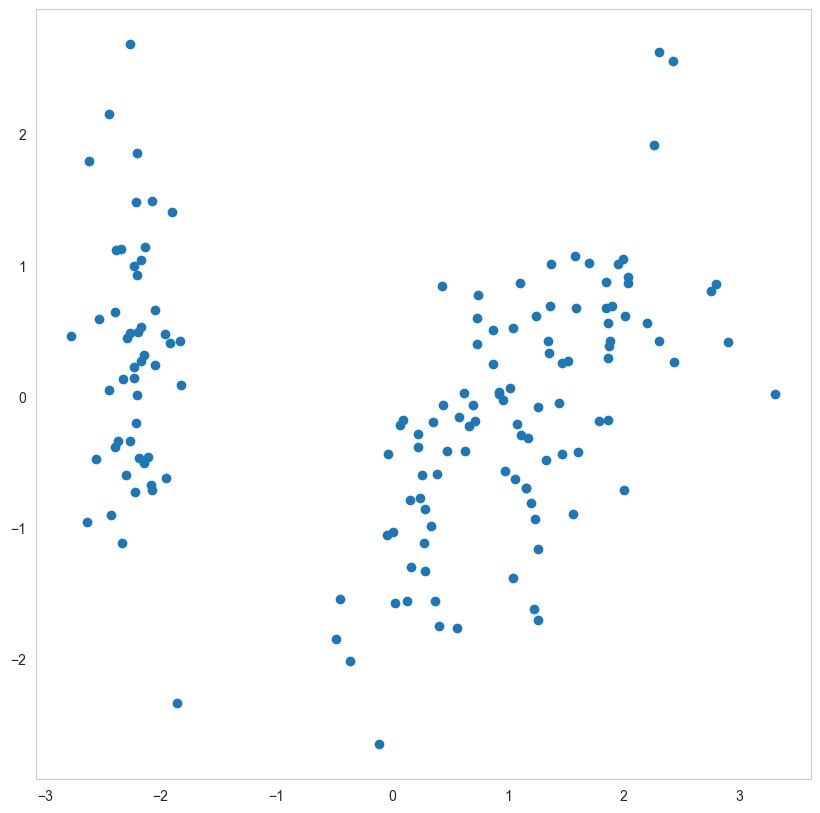

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import seaborn as sns; sns.set_style("whitegrid", {'axes.grid' : False})

%matplotlib inline
np.random.seed(0)

# Iris dataset
DF_data = pd.DataFrame(load_iris().data, 
                       index = ["iris_%d" % i for i in range(load_iris().data.shape[0])],
                       columns = load_iris().feature_names)

Se_targets = pd.Series(load_iris().target, 
                       index = ["iris_%d" % i for i in range(load_iris().data.shape[0])], 
                       name = "Species")

# Scaling mean = 0, var = 1
DF_standard = pd.DataFrame(StandardScaler().fit_transform(DF_data), 
                           index = DF_data.index,
                           columns = DF_data.columns)

# Sklearn for Principal Componenet Analysis

# Dims
m = DF_standard.shape[1]
K = 4

# PCA (How I tend to set it up)
M_PCA = decomposition.PCA(n_components=m)
DF_PCA = pd.DataFrame(M_PCA.fit_transform(DF_standard), 
                columns=["PC%d" % k for k in range(1,m + 1)]).iloc[:,:K]


# Plot the eigenvectors
#https://stackoverflow.com/questions/18299523/basic-example-for-pca-with-matplotlib

# This is where stuff gets weird...
data = DF_standard

mu = data.mean(axis=0)
eigenvectors, eigenvalues = M_PCA.components_, M_PCA.explained_variance_ #eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = DF_PCA #np.dot(data, eigenvectors)

sigma = projected_data.std(axis=0).mean()

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(projected_data["PC1"], projected_data["PC2"])
for axis, color in zip(eigenvectors[:K], ["red","green"]):
#     start, end = mu, mu + sigma * axis ### leads to "ValueError: too many values to unpack (expected 2)"

    # So I tried this but I don't think it's correct
    start, end = (mu)[:K], (mu + sigma * axis)[:K] 
    ax.annotate('', xy=end,xytext=start, arrowprops=dict(facecolor=color, width=1.0))
    
ax.set_aspect('equal')
plt.show()